In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Dataset
df = pd.read_csv("sales_data.csv", parse_dates=['Date'])

In [45]:
# Basic Info
print("Dataset Info:")
print(df.info())
# Conclusion:
# The dataset has 100,000 entries and 4 columns.
# - `Date` is a datetime object.
# - `Product` is categorical.
# - `Units_Sold` is integer.
# - `Revenue` is float.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        100000 non-null  datetime64[ns]
 1   Product     100000 non-null  object        
 2   Units_Sold  100000 non-null  int64         
 3   Revenue     100000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.1+ MB
None


In [47]:
print(" First 5 Rows:")
print(df.head())
# Conclusion:
# Data looks clean with expected structure.

 First 5 Rows:
        Date     Product  Units_Sold  Revenue
0 2022-04-13     Monitor           7   318.07
1 2022-12-15     Printer          15  1887.45
2 2022-09-28     Printer          14   139.63
3 2022-04-17  Smartphone          13  1218.73
4 2022-03-13     Printer          12   787.58


In [ ]:
#  Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# Conclusion:
# Data looks clean with expected structure.


🧼 Missing Values:
Date          0
Product       0
Units_Sold    0
Revenue       0
dtype: int64


In [51]:
#  Descriptive Statistics
print(" Descriptive Stats:")
print(df.describe())

#  Conclusion:
# - Average `Units_Sold` ≈ 10 with a range from 1 to 19.
# - Revenue ranges from $100 to nearly $2000, suggesting significant price variability.

 Descriptive Stats:
                             Date     Units_Sold        Revenue
count                      100000  100000.000000  100000.000000
mean   2022-07-01 13:06:26.496000      10.007690    1050.295219
min           2022-01-01 00:00:00       1.000000     100.000000
25%           2022-04-01 00:00:00       5.000000     575.175000
50%           2022-07-02 00:00:00      10.000000    1049.545000
75%           2022-10-01 00:00:00      15.000000    1525.197500
max           2022-12-31 00:00:00      19.000000    1999.990000
std                           NaN       5.479371     548.044562


In [ ]:
#  Unique Values
print(" Unique Products:")
print(df['Product'].value_counts())

#  Conclusion:
# The product distribution appears fairly balanced across the 5 categories.


 Unique Products:
Product
Smartphone    20089
Printer       20067
Laptop        20004
Tablet        19921
Monitor       19919
Name: count, dtype: int64


In [57]:
#  Date Range
print(f"Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")

#  Conclusion:
# The dataset spans the full year of 2022.

Date Range: 2022-01-01 to 2022-12-31


In [67]:
# Aggregated Daily Sales
daily_sales = df.groupby('Date').agg({'Units_Sold': 'sum', 'Revenue': 'sum'}).reset_index()

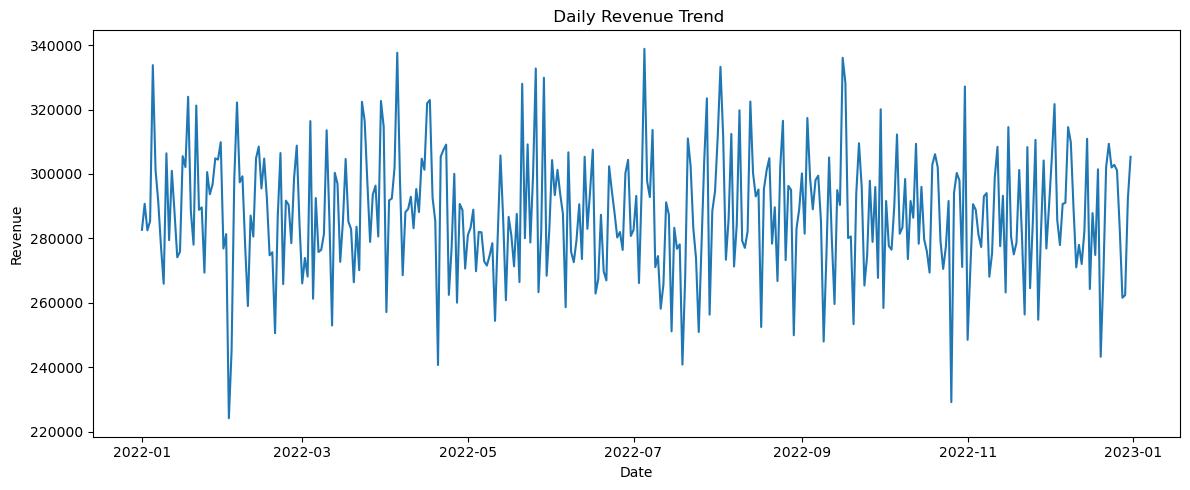

In [61]:
# Revenue Trend Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x='Date', y='Revenue')
plt.title(" Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

#  Conclusion:
# Daily revenue fluctuates but follows an overall steady pattern without extreme seasonal variation.


In [69]:
#  Product-wise Summary
product_group = df.groupby('Product').agg({'Units_Sold': 'sum', 'Revenue': 'sum'}).sort_values(by='Revenue', ascending=False)
print(" Product-Wise Summary:")
print(product_group)

# Conclusion:
# We can identify which products generate the most revenue and units sold.
# For example, higher revenue products like Laptops or Smartphones may dominate total earnings.


 Product-Wise Summary:
            Units_Sold      Revenue
Product                            
Smartphone      201187  21187784.99
Printer         200760  21076508.89
Laptop          200771  21019315.89
Monitor         199037  20974923.10
Tablet          199014  20770989.01


C:\Users\bhara\AppData\Local\Temp\ipykernel_8956\1608985000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_group.reset_index(), x='Product', y='Revenue', palette='viridis')


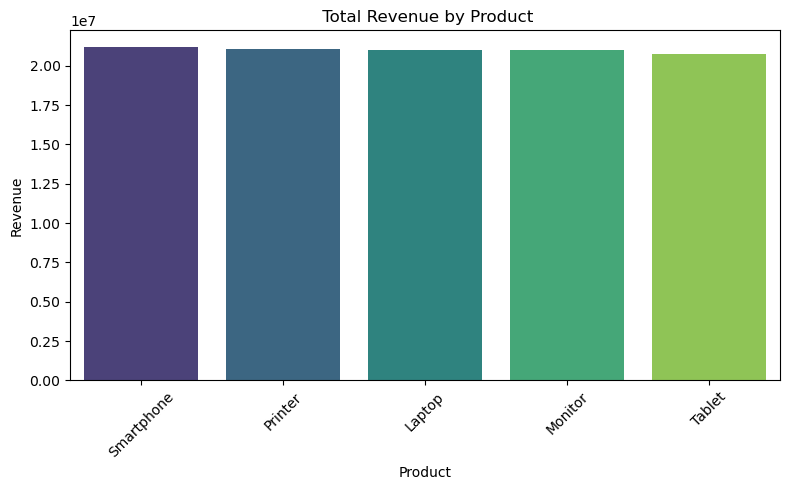

In [71]:
#  Barplot of Revenue by Product
plt.figure(figsize=(8, 5))
sns.barplot(data=product_group.reset_index(), x='Product', y='Revenue', palette='viridis')
plt.title(" Total Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion:
# Clear visual confirmation of the highest and lowest revenue-generating products.

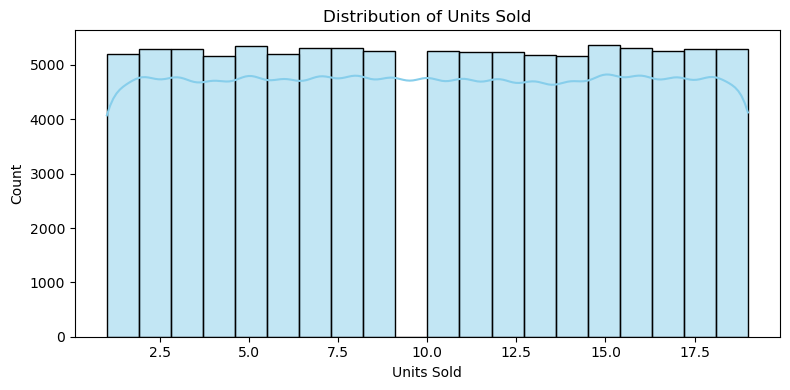

In [73]:
#  Distribution of Units Sold
plt.figure(figsize=(8, 4))
sns.histplot(df['Units_Sold'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Units Sold")
plt.xlabel("Units Sold")
plt.tight_layout()
plt.show()


# Conclusion:
# Most transactions involve 5–15 units, following a bell-shaped distribution.

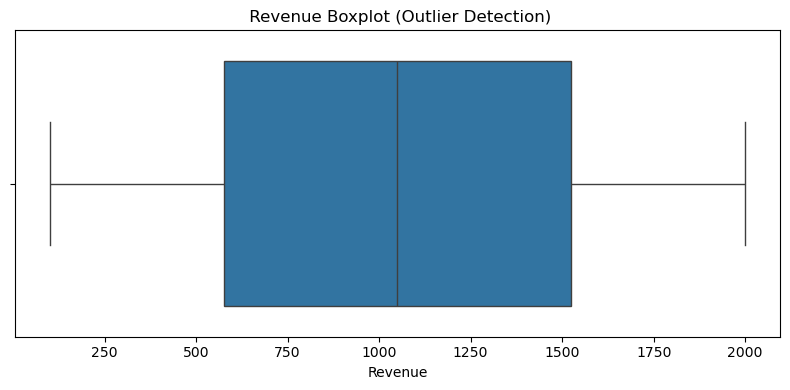

In [75]:
#  Revenue Distribution (BoxPlot)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Revenue', data=df)
plt.title(" Revenue Boxplot (Outlier Detection)")
plt.tight_layout()
plt.show()

#  Conclusion:
# Revenue has many high-value outliers. This is typical for high-end products like Laptops or bulk orders.


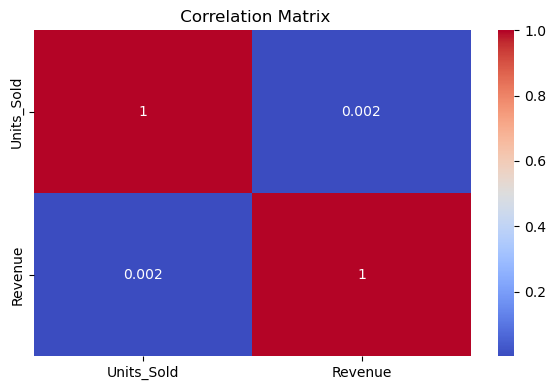

In [77]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Units_Sold', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Matrix")
plt.tight_layout()
plt.show()

#  Conclusion:
# Positive correlation between `Units_Sold` and `Revenue`, but not very strong.
# This suggests revenue may also be influenced by product price rather than quantity alone.